### 4. Labeling

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_english = pd.read_csv('/content/drive/MyDrive/beacukai500tweet/terjemahanbeacukai500tweet.csv', index_col=0)
data_english

,full_text,tweet_english
0,jadi ong ex kepala beacukai yogyakarta viral s...,so ong ex head of customs yogyakarta viral kpk...
1,bea cukai dah belakang viral nongol mulu wkwk,customs bye bye viral nongolulu wkwk
2,ga beacukai harga tiket domestik podo ngotak r...,no customs domestic ticket prices podo ngotak ...
3,bea cukai cen gatheeeel,customs cen gatheeeel
4,i see still masih bingung atur beacukai sepert...,I see still confused about how to set up custo...
...,...,...
497,klo kamu rasa hidup hanya beban ingat kasus be...,"If you think life is just a burden, remember t..."
498,jadi inget waktu victoria secret ada store ind...,so I remember when victoria secret had an indo...
499,hasil tengah halaldah rahasia umum orang beacu...,middle result halaldah general secret people b...
500,temenin julpa gt bea cukai,temenin julpa gt customs


In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data_tweet = [str(tweet) for tweet in data_english['tweet_english']]
polaritas = 0

status = [] # Status sentiment
total_positif = total_negatif = total_netral = total = 0

# Penerapan Labeling
for i, tweet in enumerate(data_tweet):
  if tweet is not None and tweet.strip() != '':
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
      total_positif += 1
      status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
      total_netral += 1
      status.append('Netral')
    else:
      total_negatif += 1
      status.append('Negatif')

  total += 1

print(f"Hasil Analisis Data:\nPositif = {total_positif}\nNegatif = {total_negatif}\nNetral = {total_netral}")
print(f"\nTotal Data : {total}")

Hasil Analisis Data:
Positif = 196
Negatif = 103
Netral = 203

Total Data : 502


In [ ]:
data_english['klasifikasi'] = status
data_english

,full_text,tweet_english,klasifikasi
0,jadi ong ex kepala beacukai yogyakarta viral s...,so ong ex head of customs yogyakarta viral kpk...,Netral
1,bea cukai dah belakang viral nongol mulu wkwk,customs bye bye viral nongolulu wkwk,Netral
2,ga beacukai harga tiket domestik podo ngotak r...,no customs domestic ticket prices podo ngotak ...,Netral
3,bea cukai cen gatheeeel,customs cen gatheeeel,Netral
4,i see still masih bingung atur beacukai sepert...,I see still confused about how to set up custo...,Negatif
...,...,...,...
497,klo kamu rasa hidup hanya beban ingat kasus be...,"If you think life is just a burden, remember t...",Netral
498,jadi inget waktu victoria secret ada store ind...,so I remember when victoria secret had an indo...,Positif
499,hasil tengah halaldah rahasia umum orang beacu...,middle result halaldah general secret people b...,Negatif
500,temenin julpa gt bea cukai,temenin julpa gt customs,Netral


### 5. Visualisasi

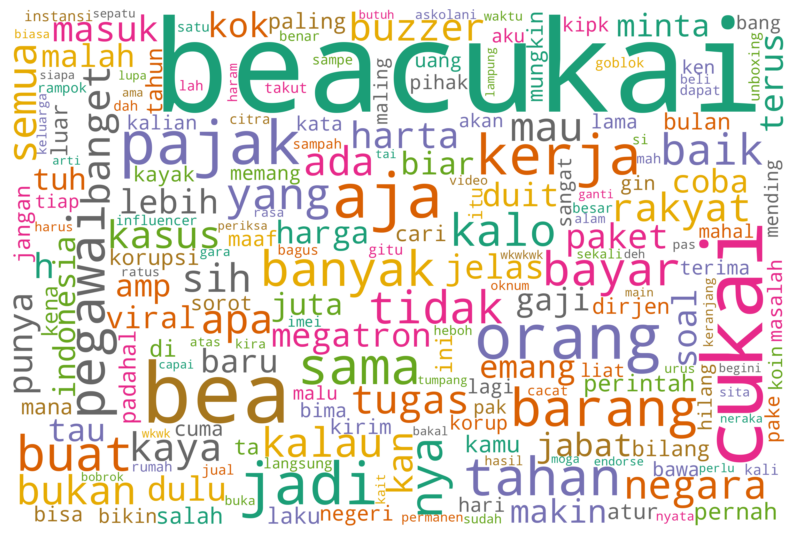

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis(False)
  plt.show()

all_words = ' '.join([tweets for tweets in data_english['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='white',
    colormap='Dark2_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

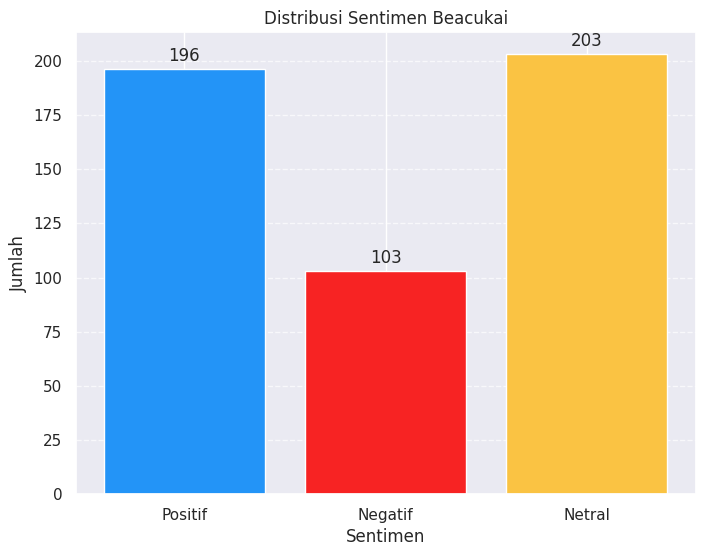

In [ ]:
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8, 6))
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Beacukai")

### 6. Klasifikasi Sentiment

In [ ]:
data_english

,full_text,tweet_english,klasifikasi
0,jadi ong ex kepala beacukai yogyakarta viral s...,so ong ex head of customs yogyakarta viral kpk...,Netral
1,bea cukai dah belakang viral nongol mulu wkwk,customs bye bye viral nongolulu wkwk,Netral
2,ga beacukai harga tiket domestik podo ngotak r...,no customs domestic ticket prices podo ngotak ...,Netral
3,bea cukai cen gatheeeel,customs cen gatheeeel,Netral
4,i see still masih bingung atur beacukai sepert...,I see still confused about how to set up custo...,Negatif
...,...,...,...
497,klo kamu rasa hidup hanya beban ingat kasus be...,"If you think life is just a burden, remember t...",Netral
498,jadi inget waktu victoria secret ada store ind...,so I remember when victoria secret had an indo...,Positif
499,hasil tengah halaldah rahasia umum orang beacu...,middle result halaldah general secret people b...,Negatif
500,temenin julpa gt bea cukai,temenin julpa gt customs,Netral


In [ ]:
# Drop full_text
dataset = data_english.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
# Klasifikasi
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
  if(n[1] == 'Posifit'):
    set_positif.append(n)
  elif(n[1] == 'Negatif'):
    set_negatif.append(n)
  else:
    set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
  train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Accuracy: ", cl.accuracy(dataset))

Accuracy:  0.6733067729083665


In [ ]:
# Labeling
data_tweet = list(data_english['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet, classifier=cl)

  if analysis.classify() == 'Positif':
    total_positif += 1
  elif analysis.classify() == 'Netral':
    total_netral += 1
  else:
    total_negatif += 1

  status.append(analysis.classify())
  total += 1

print(f"Hasil Analisis Data:\nPositif = {total_positif}\nNegatif = {total_negatif}\nNetral = {total_netral}")
print(f"\nTotal Data : {total}")

Hasil Analisis Data:
Positif = 137
Negatif = 32
Netral = 333

Total Data : 502


In [ ]:
# Masukan kedalam data
status = pd.DataFrame({"Klasifikasi Bayes": status})
data_english['klasifikasi_bayes'] = status

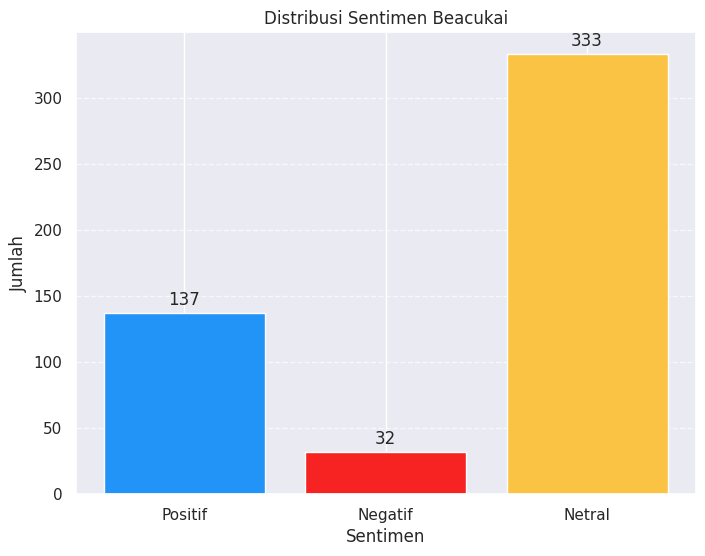

In [ ]:
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8, 6))
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Beacukai")

In [ ]:
data_english

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,jadi ong ex kepala beacukai yogyakarta viral s...,so ong ex head of customs yogyakarta viral kpk...,Netral,Netral
1,bea cukai dah belakang viral nongol mulu wkwk,customs bye bye viral nongolulu wkwk,Netral,Netral
2,ga beacukai harga tiket domestik podo ngotak r...,no customs domestic ticket prices podo ngotak ...,Netral,Netral
3,bea cukai cen gatheeeel,customs cen gatheeeel,Netral,Netral
4,i see still masih bingung atur beacukai sepert...,I see still confused about how to set up custo...,Negatif,Positif
...,...,...,...,...
497,klo kamu rasa hidup hanya beban ingat kasus be...,"If you think life is just a burden, remember t...",Netral,Netral
498,jadi inget waktu victoria secret ada store ind...,so I remember when victoria secret had an indo...,Positif,Positif
499,hasil tengah halaldah rahasia umum orang beacu...,middle result halaldah general secret people b...,Negatif,Negatif
500,temenin julpa gt bea cukai,temenin julpa gt customs,Netral,Netral


In [ ]:
# Ubah bentuk data
data_eval = [tuple(x) for x in data_english.to_records(index=False)]

for n in data_eval:
  if len(n) >= 4:
    if n[2] != 3:
      print(f"Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]} \n ")
    else:
      print("Tuple tidak memiliki elemen.")

Text: jadi ong ex kepala beacukai yogyakarta viral selidik kpk jadi sangka korupsi
Classifier: Netral
Classifier Bayes: Netral 
 
Text: bea cukai dah belakang viral nongol mulu wkwk
Classifier: Netral
Classifier Bayes: Netral 
 
Text: ga beacukai harga tiket domestik podo ngotak regone
Classifier: Netral
Classifier Bayes: Netral 
 
Text: bea cukai cen gatheeeel
Classifier: Netral
Classifier Bayes: Netral 
 
Text: i see still masih bingung atur beacukai seperti karena sosialisasi sangat kurang minim
Classifier: Negatif
Classifier Bayes: Positif 
 
Text: beacukai kumpul orangorang guna ngotak anggur ken dapet duit instan banyak mungkin mending bubarin aja kalau mah
Classifier: Positif
Classifier Bayes: Positif 
 
Text: udah banya banget berita tntg bea cukai
Classifier: Positif
Classifier Bayes: Positif 
 
Text: sinting bea cukai
Classifier: Negatif
Classifier Bayes: Netral 
 
Text: imagine yati kerja bea cukai
Classifier: Netral
Classifier Bayes: Netral 
 
Text: beacukai tuh
Classifier:

In [ ]:
# Vader Sentiment
!pip install VaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
data_tweet = list(data_english['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = vader_analyzer.polarity_scores(tweet)
    if analysis['compound'] > 0:
        total_positif += 1
    elif analysis['compound'] == 0:
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis['compound'])
    total += 1

print(f"Hasil Analisis Data:\nPositif = {total_positif}\nNegatif = {total_negatif}\nNetral = {total_netral}")
print(f"\nTotal Data : {total}")

Hasil Analisis Data:
Positif = 184
Negatif = 143
Netral = 175

Total Data : 502


In [ ]:
status = pd.DataFrame({"Vader Sentiment": status})
data_english['vader_sentiment'] = status

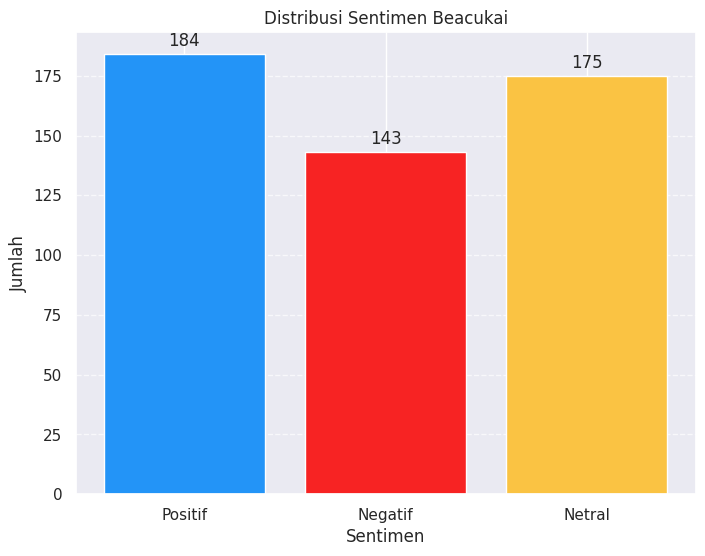

In [ ]:
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8, 6))
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Beacukai")

In [ ]:
data_english

,full_text,tweet_english,klasifikasi,klasifikasi_bayes,vader_sentiment
0,jadi ong ex kepala beacukai yogyakarta viral s...,so ong ex head of customs yogyakarta viral kpk...,Netral,Netral,-0.2263
1,bea cukai dah belakang viral nongol mulu wkwk,customs bye bye viral nongolulu wkwk,Netral,Netral,0.0000
2,ga beacukai harga tiket domestik podo ngotak r...,no customs domestic ticket prices podo ngotak ...,Netral,Netral,-0.2960
3,bea cukai cen gatheeeel,customs cen gatheeeel,Netral,Netral,0.0000
4,i see still masih bingung atur beacukai sepert...,I see still confused about how to set up custo...,Negatif,Positif,-0.3182
...,...,...,...,...,...
497,klo kamu rasa hidup hanya beban ingat kasus be...,"If you think life is just a burden, remember t...",Netral,Netral,-0.4404
498,jadi inget waktu victoria secret ada store ind...,so I remember when victoria secret had an indo...,Positif,Positif,0.4939
499,hasil tengah halaldah rahasia umum orang beacu...,middle result halaldah general secret people b...,Negatif,Negatif,0.0000
500,temenin julpa gt bea cukai,temenin julpa gt customs,Netral,Netral,0.2732


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    sentiment = torch.argmax(logits, dim=1).item()
    return sentiment

data_tweet = list(data_english['tweet_english'])

status = []
total_positif = total_negatif = total_netral = total = 0

for tweet in data_tweet:
    sentiment = get_sentiment(tweet)
    if sentiment == 2:
        total_positif += 1
    elif sentiment == 1:
        total_netral += 1
    else:
        total_negatif += 1

    status.append(sentiment)
    total += 1

print(f"Hasil Analisis Data:\nPositif = {total_positif}\nNegatif = {total_negatif}\nNetral = {total_netral}")
print(f"\nTotal Data : {total}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Hasil Analisis Data:
Positif = 35
Negatif = 173
Netral = 294

Total Data : 502


In [ ]:
status = pd.DataFrame({"RoBERTa Sentiment": status})
data_english['roberta_sentiment'] = status

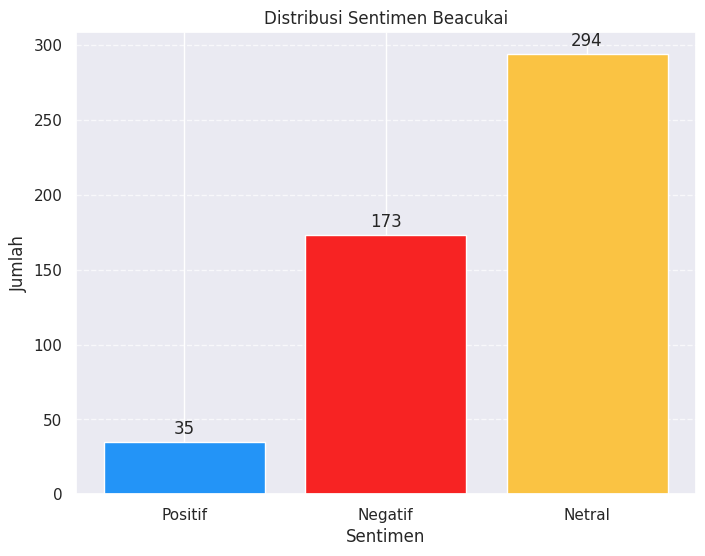

In [ ]:
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8, 6))
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Beacukai")

In [ ]:
data_english

,full_text,tweet_english,klasifikasi,klasifikasi_bayes,vader_sentiment,roberta_sentiment
0,jadi ong ex kepala beacukai yogyakarta viral s...,so ong ex head of customs yogyakarta viral kpk...,Netral,Netral,-0.2263,0
1,bea cukai dah belakang viral nongol mulu wkwk,customs bye bye viral nongolulu wkwk,Netral,Netral,0.0000,1
2,ga beacukai harga tiket domestik podo ngotak r...,no customs domestic ticket prices podo ngotak ...,Netral,Netral,-0.2960,1
3,bea cukai cen gatheeeel,customs cen gatheeeel,Netral,Netral,0.0000,1
4,i see still masih bingung atur beacukai sepert...,I see still confused about how to set up custo...,Negatif,Positif,-0.3182,0
...,...,...,...,...,...,...
497,klo kamu rasa hidup hanya beban ingat kasus be...,"If you think life is just a burden, remember t...",Netral,Netral,-0.4404,0
498,jadi inget waktu victoria secret ada store ind...,so I remember when victoria secret had an indo...,Positif,Positif,0.4939,1
499,hasil tengah halaldah rahasia umum orang beacu...,middle result halaldah general secret people b...,Negatif,Negatif,0.0000,1
500,temenin julpa gt bea cukai,temenin julpa gt customs,Netral,Netral,0.2732,1
